# Google Gemini Cheat Sheet: LangChain

The `langchain-google-genai` provides access to Google's powerful Gemini models directly via the Gemini API & Google AI Studio. Google AI Studio enables rapid prototyping and experimentation, making it an ideal starting point for individual developers.

[LangChain](https://python.langchain.com/) is a framework for developing AI applications. The `langchain-google-genai` package connects LangChain with Google's Gemini models. [LangGraph](https://python.langchain.com/docs/langgraph/) is a library for building stateful, multi-actor applications with LLMs.

All examples use the `gemini-2.0-flash` model. Gemini 2.5 Pro and 2.5 Flash can be used via  `gemini-2.5-pro-preview-03-25` and `gemini-2.5-flash-preview-04-17`. All model ids can be found in the [Gemini API docs](https://ai.google.dev/gemini-api/docs/models).

Start for free and get your API key from [Google AI Studio](https://aistudio.google.com/app/apikey).

1. Install the package `langchain-google-genai`

In [47]:
%pip install langchain-google-genai

2. Set your API key

In [49]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

## Google Gemini with LangChain Chat Models

Learn how to use Google Gemini chat models within LangChain for basic text generation and conversation tasks.

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Simple invocation
messages = [
    ("system", "You are a helpful assistant that translates English to Chinese."),
    ("human", "I love programming."),
]
response = llm.invoke(messages)
print(response.content)  # Output: J'adore la programmation.

我喜欢编程。(Wǒ xǐhuan biānchéng.)


### Chain calls with Prompt Template

Discover how to chain LangChain prompt templates with Gemini models for flexible and dynamic input processing.

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate

# Initialize model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
)

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that translates {input_language} to {output_language}."),
    ("human", "{input}"),
])

chain = prompt | llm
result = chain.invoke({
    "input_language": "English",
    "output_language": "Chinese",
    "input": "I love programming.",
})
print(result.content)  # Output: Ich liebe Programmieren.

我喜欢编程。(Wǒ xǐhuan biānchéng.)


### Image Input

Explore using image inputs (URLs or local files) with multimodal Gemini models in LangChain for vision tasks.

In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
import base64

# Initialize model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Using an image URL
message_url = HumanMessage(
    content=[
        {"type": "text", "text": "Describe this image."},
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)
result_url = llm.invoke([message_url])
print(result_url.content)

# Using a local image
local_image_path = "./react.png"
with open(local_image_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

message_local = HumanMessage(
    content=[
        {"type": "text", "text": "Describe this image."},
        {"type": "image_url", "image_url": f"data:image/png;base64,{encoded_image}"}
    ]
)
result_local = llm.invoke([message_local])
print(result_local.content)

Here's a description of the image:

**Overall Impression:**

The image is a serene landscape featuring a snowy mountain range under a soft, pastel-colored sky. The scene evokes a sense of tranquility and cold beauty.

**Elements:**

*   **Mountains:** The mountains are the dominant feature. One mountain peak is especially prominent on the right side of the frame, covered in snow and rocky features. The foreground shows a smoother, snow-covered slope.
*   **Sky:** The sky is filled with soft, pastel colors, likely indicating either dawn or dusk. The colors range from light pinks and purples to pale blues, creating a gentle, calming effect. There are clouds scattered across the sky.
*   **Lighting:** The lighting is soft and diffused, which adds to the tranquil atmosphere. The mountain peak on the right appears to be catching the light, highlighting its texture.

**Composition:**

The composition is relatively simple and balanced. The mountain range occupies the lower portion of the fram

### Audio Input

Understand how to provide audio file data to Gemini models via LangChain for audio processing like transcription.

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
import base64

# Initialize model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

audio_file_path = "./porsche.mp3"
audio_mime_type = "audio/mpeg"

with open(audio_file_path, "rb") as audio_file:
    encoded_audio = base64.b64encode(audio_file.read()).decode('utf-8')

message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe this audio."},
        {"type": "media", "data": encoded_audio, "mime_type": audio_mime_type}
    ]
)
response = llm.invoke([message])
print(response.content)

If the Porsche Macan has proven anything, it's that the days of sacrificing performance for practicality are gone, long gone. Engineered to deliver a driving experience like no other, the Macan has demonstrated excellence in style and performance to become the leading sports car in its class. So don't let those five doors fool you. Once you're in the driver's seat, one thing will become immediately clear. This is a Porsche. The Macan, now leasing from 3.99%. conditions apply.


### Video Input

See how to utilize video file input with Gemini models in LangChain for video understanding and analysis.

In [12]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
import base64

# Initialize model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

video_file_path = "./screen.mp4"
video_mime_type = "video/mp4"

with open(video_file_path, "rb") as video_file:
    encoded_video = base64.b64encode(video_file.read()).decode('utf-8')

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe what's happening in this video."},
        {"type": "media", "data": encoded_video, "mime_type": video_mime_type}
    ]
)
response = llm.invoke([message])
print(response.content)

Here's a breakdown of what's happening in the video:

*   **0:00-0:08:** The video starts with a gray rectangle at the bottom and the rest of the screen is white.
*   **0:09-0:14:** A Google search page appears. The search query is "What is Gemini 2.5 Flash? When was it launched and what are its key capabilities". A privacy consent window pops up in the middle of the screen.
*   **0:15-0:20:** The privacy consent window is analyzed with bounding boxes.
*   **0:20-0:33:** The search results page is displayed.
*   **0:34-0:40:** The search results page disappears.
*   **0:41-0:50:** A Google for Developers page loads, titled "Start building with Gemini 2.5 Flash".
*   **0:51-1:05:** The Google for Developers page is shown.
*   **1:05:** The video ends.


### Image Generation

Generate images from text prompts using specialized Gemini models integrated with LangChain.

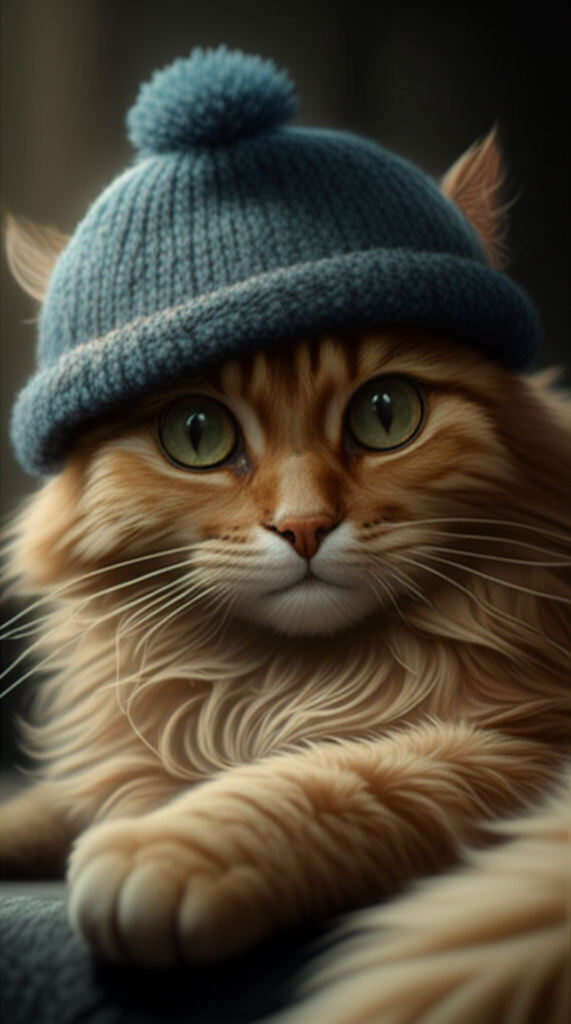

In [50]:
from langchain_google_genai import ChatGoogleGenerativeAI
import base64
from IPython.display import Image, display

# Initialize model for image generation
llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-exp-image-generation")

message = {
    "role": "user",
    "content": "Generate an image of a cuddly cat wearing a hat.",
}

response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

image_base64 = response.content[1].get("image_url").get("url").split(",")[-1]

image_data = base64.b64decode(image_base64)
display(Image(data=image_data, width=300))

In [42]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate

from langchain_google_genai import ChatGoogleGenerativeAI, Modality

llm = ChatGoogleGenerativeAI(
    model="models/gemini-2.0-flash-exp-image-generation",
    response_modalities=[Modality.TEXT, Modality.IMAGE],
)

prompt = ChatPromptTemplate(
    [("human", "Generate an image of {animal} and tell me the sound of the animal")]
)
chain = {"animal": RunnablePassthrough()} | prompt | llm
res = chain.invoke("cat")

### Tool Calling/Function Calling

Learn to implement tool calling (function calling) with Gemini models in LangChain to execute custom functions.

In [22]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage

# Define a tool
@tool(description="Get the current weather in a given location")
def get_weather(location: str) -> str:
    return "It's sunny."

# Initialize model and bind the tool
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools([get_weather])

# Invoke with a query that should trigger the tool
query = "What's the weather in Beijing?"
ai_msg = llm_with_tools.invoke(query)

# Access tool calls in the response
print(ai_msg.tool_calls)

# Pass tool results back to the model
tool_message = ToolMessage(
    content=get_weather(*ai_msg.tool_calls[0]['args']),
    tool_call_id=ai_msg.tool_calls[0]['id']
)
final_response = llm_with_tools.invoke([ai_msg, tool_message])
print(final_response.content)

[{'name': 'get_weather', 'args': {'location': 'Beijing'}, 'id': '5a8f7dfd-66c0-4a1c-853d-c96730a461d7', 'type': 'tool_call'}]


<ipython-input-22-853cb25753d1>:23: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  content=get_weather(*ai_msg.tool_calls[0]['args']),


OK. It's sunny in Beijing.


### Built-in Tools (Google Search, Code Execution)

Leverage Gemini's built-in tools like Google Search and Code Execution directly within your LangChain applications.

In [23]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

# Initialize model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Google Search
search_resp = llm.invoke(
    "When is the next total solar eclipse in China?",
    tools=[GenAITool(google_search={})],
)
print(search_resp.content)

# Code Execution
code_resp = llm.invoke(
    "What is 2*2, use python",
    tools=[GenAITool(code_execution={})],
)

for c in code_resp.content:
    if isinstance(c, dict):
        if c["type"] == 'code_execution_result':
            print(f"Code execution result: {c['code_execution_result']}")
        elif c["type"] == 'executable_code':
            print(f"Executable code: {c['executable_code']}")
    else:
        print(c)

The next total solar eclipse that will be visible in China is on March 20, 2034. However, it will only be visible in remote provinces such as Tibet and Qinghai. Another total solar eclipse will occur on September 2, 2035.
Executable code: print(2 * 2)

Code execution result: 4

2 * 2 = 4


/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:582: UserWarning: 
        ⚠️ Warning: Output may vary each run.  
        - 'executable_code': Always present.  
        - 'execution_result' & 'image_url': May be absent for some queries.  

        Validate before using in production.

  warnings.warn(


### Structured Output

Control Gemini model output to conform to a specific Pydantic schema for reliable structured data extraction in LangChain.

In [24]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI

# Define the desired structure
class Person(BaseModel):
    '''Information about a person.'''
    name: str = Field(..., description="The person's name")
    height_m: float = Field(..., description="The person's height in meters")

# Initialize the model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0)
structured_llm = llm.with_structured_output(Person)

# Invoke the model with a query asking for structured information
result = structured_llm.invoke("Who was the 16th president of the USA, and how tall was he in meters?")
print(result)  # Output: name='Abraham Lincoln' height_m=1.93

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


name='Abraham Lincoln' height_m=1.93


### Token Usage Tracking

Track token usage for Gemini model calls within LangChain to monitor costs and API consumption.

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

result = llm.invoke("Explain the concept of prompt engineering in one sentence.")

print(result.content)
print("\nUsage Metadata:")
print(result.usage_metadata)

Prompt engineering is the art of crafting effective text inputs to guide large language models (LLMs) to generate desired outputs.

Usage Metadata:
{'input_tokens': 10, 'output_tokens': 25, 'total_tokens': 35, 'input_token_details': {'cache_read': 0}}


## Google Gemini Embeddings with LangChain

Generate powerful text embeddings using Google Gemini models within the LangChain framework for semantic understanding.

In [26]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-exp-03-07")

# Embed a single query
vector = embeddings.embed_query("hello, world!")

# Embed multiple documents
vectors = embeddings.embed_documents([
    "Today is Monday",
    "Today is Tuesday",
    "Today is April Fools day",
])

### Using with Vector Store

Integrate Gemini text embeddings with LangChain vector stores for efficient similarity search and information retrieval.

In [27]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

# Initialize embeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-exp-03-07")

text = "LangChain is the framework for building context-aware reasoning applications"

# Create vector store and retriever
vectorstore = InMemoryVectorStore.from_texts([text], embedding=embeddings)
retriever = vectorstore.as_retriever()

# Retrieve similar documents
retrieved_documents = retriever.invoke("What is LangChain?")
print(retrieved_documents[0].page_content)

LangChain is the framework for building context-aware reasoning applications


### Task Types

Optimize Gemini embedding performance by selecting the appropriate task type (e.g., retrieval, classification) in LangChain.

In [28]:
%pip install scikit-learn

In [30]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity

# Different task types for different use cases
query_embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-exp-03-07",
    task_type="RETRIEVAL_QUERY"  # For queries
)
doc_embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-exp-03-07",
    task_type="RETRIEVAL_DOCUMENT"  # For documents
)

# Compare similarity
q_embed = query_embeddings.embed_query("What is the capital of China?")
d_embed = doc_embeddings.embed_documents(["The capital of China is Beijing.", "Philipp likes to eat pizza."])

for i, d in enumerate(d_embed):
    similarity = cosine_similarity([q_embed], [d])[0][0]
    print(f"Document {i+1} similarity: {similarity}")

Document 1 similarity: 0.7994988750918859
Document 2 similarity: 0.5360350938087957
